In [39]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
from sklearn.model_selection import train_test_split

<ol><li><p><strong>Assume a Prior Distribution for the Weights:</strong></p><ul><li>Choose a prior distribution for the weights. A common choice is a multivariate normal distribution. The prior distribution represents your beliefs about the likely values of the weights before seeing any data.</li></ul><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>P</mi><mo stretchy="false">(</mo><mi>w</mi><mo stretchy="false">)</mo><mo>=</mo><mi mathvariant="script">N</mi><mo stretchy="false">(</mo><mi>w</mi><mi mathvariant="normal">∣</mi><msub><mi>μ</mi><mn>0</mn></msub><mo separator="true">,</mo><msub><mi mathvariant="normal">Σ</mi><mn>0</mn></msub><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">P(w) = \mathcal{N}(w | \mu_0, \Sigma_0)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathcal" style="margin-right: 0.14736em;">N</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span><span class="mord">∣</span><span class="mord"><span class="mord mathnormal">μ</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3011em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">0</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord"><span class="mord">Σ</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3011em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">0</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mclose">)</span></span></span></span></span></p><p>Where <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>μ</mi><mn>0</mn></msub></mrow><annotation encoding="application/x-tex">\mu_0</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.625em; vertical-align: -0.1944em;"></span><span class="mord"><span class="mord mathnormal">μ</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3011em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">0</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span></span></span></span></span> is the prior mean and <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi mathvariant="normal">Σ</mi><mn>0</mn></msub></mrow><annotation encoding="application/x-tex">\Sigma_0</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8333em; vertical-align: -0.15em;"></span><span class="mord"><span class="mord">Σ</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3011em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">0</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span></span></span></span></span> is the prior covariance matrix.</p></li><li><p><strong>Calculate the Posterior Distribution:</strong></p><ul><li>Update your beliefs based on the observed data. Use Bayes' theorem to calculate the posterior distribution of the weights given the data.</li></ul><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>P</mi><mo stretchy="false">(</mo><mi>w</mi><mi mathvariant="normal">∣</mi><mi>X</mi><mo separator="true">,</mo><mi>y</mi><mo stretchy="false">)</mo><mo>∝</mo><mi>P</mi><mo stretchy="false">(</mo><mi>y</mi><mi mathvariant="normal">∣</mi><mi>X</mi><mo separator="true">,</mo><mi>w</mi><mo stretchy="false">)</mo><mo>⋅</mo><mi>P</mi><mo stretchy="false">(</mo><mi>w</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">P(w | X, y) \propto P(y | X, w) \cdot P(w)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span><span class="mord">∣</span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">∝</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="mord">∣</span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">⋅</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span><span class="mclose">)</span></span></span></span></span></p><p>The likelihood <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>P</mi><mo stretchy="false">(</mo><mi>y</mi><mi mathvariant="normal">∣</mi><mi>X</mi><mo separator="true">,</mo><mi>w</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">P(y | X, w)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="mord">∣</span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span><span class="mclose">)</span></span></span></span></span> is assumed to be a normal distribution.</p></li><li><p><strong>Compute the Posterior Mean and Covariance:</strong></p><ul><li>The posterior distribution will have a mean (<span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mover accent="true"><mi>w</mi><mo>ˉ</mo></mover></mrow><annotation encoding="application/x-tex">\bar{w}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.5678em;"></span><span class="mord accent"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1667em;"><span class="mord">ˉ</span></span></span></span></span></span></span></span></span></span></span>) and a covariance matrix (<span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup></mrow><annotation encoding="application/x-tex">A^{-1}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span></span></span></span></span>).</li></ul><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>P</mi><mo stretchy="false">(</mo><mi>w</mi><mi mathvariant="normal">∣</mi><mi>X</mi><mo separator="true">,</mo><mi>y</mi><mo stretchy="false">)</mo><mo>=</mo><mi mathvariant="script">N</mi><mo stretchy="false">(</mo><mi>w</mi><mi mathvariant="normal">∣</mi><mover accent="true"><mi>w</mi><mo>ˉ</mo></mover><mo separator="true">,</mo><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">P(w | X, y) = \mathcal{N}(w | \bar{w}, A^{-1})</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span><span class="mord">∣</span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1.0641em; vertical-align: -0.25em;"></span><span class="mord mathcal" style="margin-right: 0.14736em;">N</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span><span class="mord">∣</span><span class="mord accent"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1667em;"><span class="mord">ˉ</span></span></span></span></span></span></span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span><span class="mclose">)</span></span></span></span></span></p></li><li><p><strong>Predictive Distribution:</strong></p><ul><li>Given a new input <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>x</mi><mtext>new</mtext></msub></mrow><annotation encoding="application/x-tex">x_{\text{new}}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.5806em; vertical-align: -0.15em;"></span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord text mtight"><span class="mord mtight">new</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span></span></span></span></span>, you can calculate the predictive distribution for the target variable <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>y</mi><mtext>new</mtext></msub></mrow><annotation encoding="application/x-tex">y_{\text{new}}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.625em; vertical-align: -0.1944em;"></span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord text mtight"><span class="mord mtight">new</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span></span></span></span></span>.</li></ul><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>P</mi><mo stretchy="false">(</mo><msub><mi>y</mi><mtext>new</mtext></msub><mi mathvariant="normal">∣</mi><msub><mi>x</mi><mtext>new</mtext></msub><mo separator="true">,</mo><mi>X</mi><mo separator="true">,</mo><mi>y</mi><mo stretchy="false">)</mo><mo>=</mo><mi mathvariant="script">N</mi><mo stretchy="false">(</mo><msub><mi>y</mi><mtext>new</mtext></msub><mi mathvariant="normal">∣</mi><msup><mover accent="true"><mi>w</mi><mo>ˉ</mo></mover><mi>T</mi></msup><msub><mi>x</mi><mtext>new</mtext></msub><mo separator="true">,</mo><msup><mi>σ</mi><mn>2</mn></msup><mo>+</mo><msubsup><mi>x</mi><mtext>new</mtext><mi>T</mi></msubsup><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><msub><mi>x</mi><mtext>new</mtext></msub><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">P(y_{\text{new}} | x_{\text{new}}, X, y) = \mathcal{N}(y_{\text{new}} | \bar{w}^T x_{\text{new}}, \sigma^2 + x_{\text{new}}^T A^{-1} x_{\text{new}})</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord text mtight"><span class="mord mtight">new</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mord">∣</span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord text mtight"><span class="mord mtight">new</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1.0913em; vertical-align: -0.25em;"></span><span class="mord mathcal" style="margin-right: 0.14736em;">N</span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-left: -0.0359em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord text mtight"><span class="mord mtight">new</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mord">∣</span><span class="mord"><span class="mord accent"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1667em;"><span class="mord">ˉ</span></span></span></span></span></span></span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8413em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight" style="margin-right: 0.13889em;">T</span></span></span></span></span></span></span></span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord text mtight"><span class="mord mtight">new</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">σ</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">+</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1.0913em; vertical-align: -0.25em;"></span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.8413em;"><span style="top: -2.453em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord text mtight"><span class="mord mtight">new</span></span></span></span></span><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight" style="margin-right: 0.13889em;">T</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.247em;"><span></span></span></span></span></span></span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord text mtight"><span class="mord mtight">new</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mclose">)</span></span></span></span></span></p><p>Where <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>σ</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">\sigma^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">σ</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span></span> is the noise variance.</p></li><li><p><strong>Visualizing the Weight Space:</strong></p><ul><li>Visualize the weight space by plotting the mean weights (<span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mover accent="true"><mi>w</mi><mo>ˉ</mo></mover></mrow><annotation encoding="application/x-tex">\bar{w}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.5678em;"></span><span class="mord accent"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1667em;"><span class="mord">ˉ</span></span></span></span></span></span></span></span></span></span></span>) and the uncertainty around them using the covariance matrix (<span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup></mrow><annotation encoding="application/x-tex">A^{-1}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span></span></span></span></span>).</li></ul></li></ol>

(800, 1)
(200, 1)
(800,)
(200,)


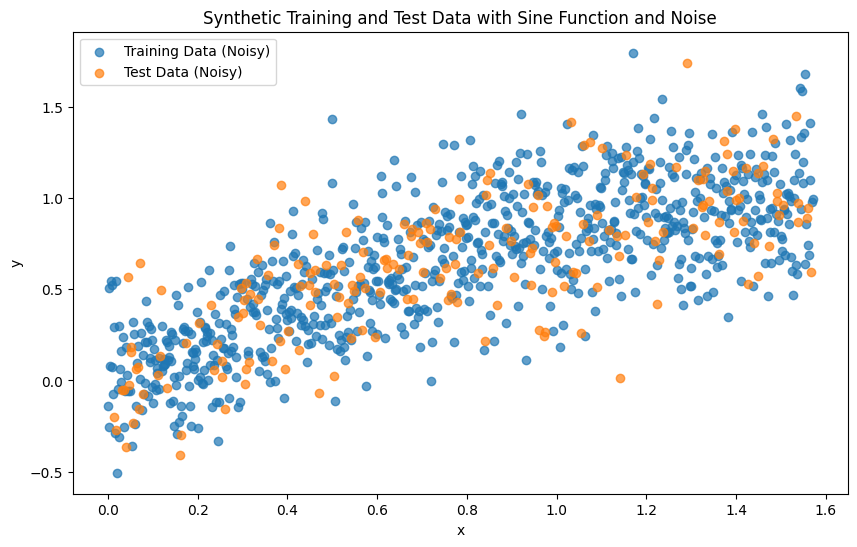

In [40]:
# GENERATE DATA
def generate_data(num_points, noise_std_dev):
    # Generate x values
    x = np.linspace(0, np.pi/2, num_points)
    # Generate y values using a sine function and add random noise
    y_true = np.sin(x)
    noise = np.random.normal(0, noise_std_dev**2, num_points)
    y_noisy = y_true + noise
    x = x.reshape(x.shape[0], 1)
    y_true.reshape(y_true.shape[0], 1)
    y_noisy.reshape(y_noisy.shape[0], 1)
    
    return x, y_noisy, y_true

NOISE = 0.5
# SHAPING OF DATA
X, Y_Noise, Y_True = generate_data(1000, NOISE)
x_train, x_test ,y_train , y_test = train_test_split(X, Y_Noise, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# Plot the synthetic data
plt.figure(figsize=(10, 6))

plt.scatter(x_train, y_train, label='Training Data (Noisy)', alpha=0.7)

plt.scatter(x_test, y_test, label='Test Data (Noisy)', alpha=0.7)

plt.title('Synthetic Training and Test Data with Sine Function and Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<div class="markdown prose w-full break-words dark:prose-invert dark"><p>In the formula <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mover accent="true"><mi>w</mi><mo>ˉ</mo></mover><mo>=</mo><mfrac><mn>1</mn><msup><mi>σ</mi><mn>2</mn></msup></mfrac><mo stretchy="false">(</mo><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mi>X</mi><mo stretchy="false">)</mo><mi>y</mi></mrow><annotation encoding="application/x-tex">\bar{w} = \frac{1}{\sigma^2} (A^{-1}X)y</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.5678em;"></span><span class="mord accent"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1667em;"><span class="mord">ˉ</span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1.1901em; vertical-align: -0.345em;"></span><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.8451em;"><span style="top: -2.655em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight"><span class="mord mathnormal mtight" style="margin-right: 0.03588em;">σ</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.7463em;"><span style="top: -2.786em; margin-right: 0.0714em;"><span class="pstrut" style="height: 2.5em;"></span><span class="sizing reset-size3 size1 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.394em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">1</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.345em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mclose">)</span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span></span></span></span>, let's break down the shapes of each component:</p><ul><li><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mover accent="true"><mi>w</mi><mo>ˉ</mo></mover></mrow><annotation encoding="application/x-tex">\bar{w}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.5678em;"></span><span class="mord accent"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1667em;"><span class="mord">ˉ</span></span></span></span></span></span></span></span></span></span></span>: This is a column vector representing the weights. If <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>A</mi></mrow><annotation encoding="application/x-tex">A</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal">A</span></span></span></span></span> is an <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>n</mi><mo>×</mo><mi>m</mi></mrow><annotation encoding="application/x-tex">n \times m</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6667em; vertical-align: -0.0833em;"></span><span class="mord mathnormal">n</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">×</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 0.4306em;"></span><span class="mord mathnormal">m</span></span></span></span></span> matrix and <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>X</mi></mrow><annotation encoding="application/x-tex">X</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span></span></span></span></span> is an <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>m</mi><mo>×</mo><mi>d</mi></mrow><annotation encoding="application/x-tex">m \times d</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6667em; vertical-align: -0.0833em;"></span><span class="mord mathnormal">m</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">×</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 0.6944em;"></span><span class="mord mathnormal">d</span></span></span></span></span> matrix, then <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mover accent="true"><mi>w</mi><mo>ˉ</mo></mover></mrow><annotation encoding="application/x-tex">\bar{w}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.5678em;"></span><span class="mord accent"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1667em;"><span class="mord">ˉ</span></span></span></span></span></span></span></span></span></span></span> will be a column vector with <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>d</mi></mrow><annotation encoding="application/x-tex">d</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6944em;"></span><span class="mord mathnormal">d</span></span></span></span></span> elements.</p><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mtext>Shape&nbsp;of&nbsp;</mtext><mover accent="true"><mi>w</mi><mo>ˉ</mo></mover><mo>:</mo><mo stretchy="false">(</mo><mi>d</mi><mo separator="true">,</mo><mn>1</mn><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">\text{Shape of } \bar{w}: (d, 1)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8889em; vertical-align: -0.1944em;"></span><span class="mord text"><span class="mord">Shape&nbsp;of&nbsp;</span></span><span class="mord accent"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1667em;"><span class="mord">ˉ</span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">:</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mopen">(</span><span class="mord mathnormal">d</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">1</span><span class="mclose">)</span></span></span></span></span></p></li><li><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>σ</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">\sigma^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">σ</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span></span>: This is a scalar (a single number).</p></li><li><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup></mrow><annotation encoding="application/x-tex">A^{-1}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span></span></span></span></span>: If <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>A</mi></mrow><annotation encoding="application/x-tex">A</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal">A</span></span></span></span></span> is a square matrix (<span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>n</mi><mo>×</mo><mi>n</mi></mrow><annotation encoding="application/x-tex">n \times n</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6667em; vertical-align: -0.0833em;"></span><span class="mord mathnormal">d</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">×</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 0.4306em;"></span><span class="mord mathnormal">d</span></span></span></span></span>) and is invertible, then <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup></mrow><annotation encoding="application/x-tex">A^{-1}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span></span></span></span></span> will also be a square matrix with the same dimensions.</p><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mtext>Shape&nbsp;of&nbsp;</mtext><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mo>:</mo><mo stretchy="false">(</mo><mi>n</mi><mo separator="true">,</mo><mi>n</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">\text{Shape of } A^{-1}: (n, n)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1.0085em; vertical-align: -0.1944em;"></span><span class="mord text"><span class="mord">Shape&nbsp;of&nbsp;</span></span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">:</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mopen">(</span><span class="mord mathnormal">d</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal">d</span><span class="mclose">)</span></span></span></span></span></p></li><li><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>X</mi></mrow><annotation encoding="application/x-tex">X</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span></span></span></span></span>: This is a matrix with <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>m</mi></mrow><annotation encoding="application/x-tex">m</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.4306em;"></span><span class="mord mathnormal">m</span></span></span></span></span> rows and <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>d</mi></mrow><annotation encoding="application/x-tex">d</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6944em;"></span><span class="mord mathnormal">d</span></span></span></span></span> columns.</p><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mtext>Shape&nbsp;of&nbsp;</mtext><mi>X</mi><mo>:</mo><mo stretchy="false">(</mo><mi>m</mi><mo separator="true">,</mo><mi>d</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">\text{Shape of } X: (m, d)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8889em; vertical-align: -0.1944em;"></span><span class="mord text"><span class="mord">Shape&nbsp;of&nbsp;</span></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">:</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mopen">(</span><span class="mord mathnormal">d</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal">n</span><span class="mclose">)</span></span></span></span></span></p></li><li><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>y</mi></mrow><annotation encoding="application/x-tex">y</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.625em; vertical-align: -0.1944em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span></span></span></span>: This is a column vector with <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>n</mi></mrow><annotation encoding="application/x-tex">n</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.4306em;"></span><span class="mord mathnormal">n</span></span></span></span></span> elements.</p><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mtext>Shape&nbsp;of&nbsp;</mtext><mi>y</mi><mo>:</mo><mo stretchy="false">(</mo><mi>n</mi><mo separator="true">,</mo><mn>1</mn><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">\text{Shape of } y: (n, 1)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8889em; vertical-align: -0.1944em;"></span><span class="mord text"><span class="mord">Shape&nbsp;of&nbsp;</span></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">:</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mopen">(</span><span class="mord mathnormal">n</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">1</span><span class="mclose">)</span></span></span></span></span></p></li></ul><p>Now, let's perform the matrix multiplication and see how the dimensions align:</p><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mo stretchy="false">(</mo><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mi>X</mi><mo stretchy="false">)</mo><mi>y</mi></mrow><annotation encoding="application/x-tex">(A^{-1}X)y</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1.0641em; vertical-align: -0.25em;"></span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mclose">)</span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span></span></span></span></p><ul><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mi>X</mi></mrow><annotation encoding="application/x-tex">A^{-1}X</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span></span></span></span></span> results in a matrix with dimensions <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mo stretchy="false">(</mo><mi>n</mi><mo separator="true">,</mo><mi>d</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">(n, d)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mopen">(</span><span class="mord mathnormal">n</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal">d</span><span class="mclose">)</span></span></span></span></span>.</li><li>Multiplying this by <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>y</mi></mrow><annotation encoding="application/x-tex">y</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.625em; vertical-align: -0.1944em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span></span></span></span> (which is <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mo stretchy="false">(</mo><mi>n</mi><mo separator="true">,</mo><mn>1</mn><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">(n, 1)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mopen">(</span><span class="mord mathnormal">n</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">1</span><span class="mclose">)</span></span></span></span></span>) results in a column vector with dimensions <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mo stretchy="false">(</mo><mi>d</mi><mo separator="true">,</mo><mn>1</mn><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">(d, 1)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mopen">(</span><span class="mord mathnormal">d</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">1</span><span class="mclose">)</span></span></span></span></span>.</li></ul><p>So, when you multiply by <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mfrac><mn>1</mn><msup><mi>σ</mi><mn>2</mn></msup></mfrac></mrow><annotation encoding="application/x-tex">\frac{1}{\sigma^2}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1.1901em; vertical-align: -0.345em;"></span><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.8451em;"><span style="top: -2.655em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight"><span class="mord mathnormal mtight" style="margin-right: 0.03588em;">σ</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.7463em;"><span style="top: -2.786em; margin-right: 0.0714em;"><span class="pstrut" style="height: 2.5em;"></span><span class="sizing reset-size3 size1 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.394em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">1</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.345em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span></span></span></span></span>, the resulting <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mover accent="true"><mi>w</mi><mo>ˉ</mo></mover></mrow><annotation encoding="application/x-tex">\bar{w}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.5678em;"></span><span class="mord accent"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.5678em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.02691em;">w</span></span><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1667em;"><span class="mord">ˉ</span></span></span></span></span></span></span></span></span></span></span> will have the shape <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mo stretchy="false">(</mo><mi>d</mi><mo separator="true">,</mo><mn>1</mn><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">(d, 1)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mopen">(</span><span class="mord mathnormal">d</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">1</span><span class="mclose">)</span></span></span></span></span>. The division by <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>σ</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">\sigma^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.03588em;">σ</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span></span> is an element-wise operation, so it doesn't affect the shape.</p></div>

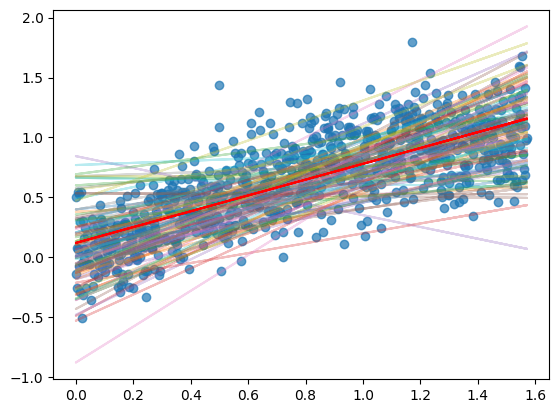

In [41]:
NOISE *= 10
def fit(xData:NDArray, yData:NDArray, noise):
    # calculate Mue
    X = np.hstack((np.ones((xData.shape[0], 1)), xData))
    A = (1/noise**2) * X.T @ X + np.linalg.inv(noise**2 * np.eye(X.T.shape[0]))
    A_inv = np.linalg.inv(A)
    w_mue = (1/noise**2) * np.dot(A_inv.dot(X.T), yData)
    w_mue = w_mue.reshape(w_mue.shape[0], 1)
    return w_mue, A_inv

def prediction(xData:NDArray, w_mue:NDArray):
    X = np.hstack((np.ones((xData.shape[0], 1)), xData))
    return X @ w_mue


w_mue, A_inv = fit(x_train, y_train, NOISE)
y = prediction(x_train, w_mue)
plt.scatter(x_train, y_train, label='Training Data (Noisy)', alpha=0.7, )
plt.plot(x_train, y, 'r', zorder=11)

num_samples = 100 # number of samples from the weight distribution
w_samples = np.random.multivariate_normal(w_mue.flatten(), A_inv, size=num_samples)

# Plot a shaded region representing the uncertainty
for i in range(num_samples):
    y_samples = prediction(x_train, w_samples[i,:])
    plt.plot(x_train, y_samples, alpha=.3)
    
plt.show()

<div class="markdown prose w-full break-words dark:prose-invert dark"><p> <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>x</mi><mo>∗</mo></msup></mrow><annotation encoding="application/x-tex">x^*</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6887em;"></span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.6887em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mbin mtight">∗</span></span></span></span></span></span></span></span></span></span></span></span> in Bayesian linear regression is given by:</p><p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>p</mi><mo stretchy="false">(</mo><msup><mi>f</mi><mo>∗</mo></msup><mi mathvariant="normal">∣</mi><msup><mi>x</mi><mo>∗</mo></msup><mo separator="true">,</mo><mi>X</mi><mo separator="true">,</mo><mi>y</mi><mo stretchy="false">)</mo><mo>∼</mo><mi mathvariant="script">N</mi><mrow><mo fence="true">(</mo><mfrac><mn>1</mn><msup><mi>s</mi><mn>2</mn></msup></mfrac><msup><mi>x</mi><mo>∗</mo></msup><mo stretchy="false">(</mo><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mi>X</mi><mo stretchy="false">)</mo><mi>y</mi><mo separator="true">,</mo><msup><mi>x</mi><mo>∗</mo></msup><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><msup><mi>x</mi><mo>∗</mo></msup><mo fence="true">)</mo></mrow></mrow><annotation encoding="application/x-tex">p(f^* | x^*, X, y) \sim \mathcal{N}\left(\frac{1}{s^2} x^* (A^{-1} X) y, x^* A^{-1} x^*\right)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal">p</span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.10764em;">f</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.6887em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mbin mtight">∗</span></span></span></span></span></span></span></span><span class="mord">∣</span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.6887em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mbin mtight">∗</span></span></span></span></span></span></span></span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">∼</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1.2em; vertical-align: -0.35em;"></span><span class="mord mathcal" style="margin-right: 0.14736em;">N</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="minner"><span class="mopen delimcenter" style="top: 0em;"><span class="delimsizing size1">(</span></span><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.8451em;"><span style="top: -2.655em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight"><span class="mord mathnormal mtight">s</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.7463em;"><span style="top: -2.786em; margin-right: 0.0714em;"><span class="pstrut" style="height: 2.5em;"></span><span class="sizing reset-size3 size1 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.394em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">1</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.345em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.6887em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mbin mtight">∗</span></span></span></span></span></span></span></span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mclose">)</span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.6887em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mbin mtight">∗</span></span></span></span></span></span></span></span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.6887em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mbin mtight">∗</span></span></span></span></span></span></span></span><span class="mclose delimcenter" style="top: 0em;"><span class="delimsizing size1">)</span></span></span></span></span></span></span></p><p>where:</p><ul><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>f</mi><mo>∗</mo></msup></mrow><annotation encoding="application/x-tex">f^*</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8889em; vertical-align: -0.1944em;"></span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.10764em;">f</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.6887em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mbin mtight">∗</span></span></span></span></span></span></span></span></span></span></span></span> is the predicted value for the new data point <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>x</mi><mo>∗</mo></msup></mrow><annotation encoding="application/x-tex">x^*</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6887em;"></span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.6887em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mbin mtight">∗</span></span></span></span></span></span></span></span></span></span></span></span>,</li><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>X</mi></mrow><annotation encoding="application/x-tex">X</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6833em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span></span></span></span></span> is the design matrix of the training data,</li><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>y</mi></mrow><annotation encoding="application/x-tex">y</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.625em; vertical-align: -0.1944em;"></span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span></span></span></span></span> is the vector of observed target values,</li><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>A</mi><mrow><mo>−</mo><mn>1</mn></mrow></msup><mo>=</mo><mo stretchy="false">(</mo><msup><mi>s</mi><mrow><mo>−</mo><mn>2</mn></mrow></msup><mi>X</mi><msup><mi>X</mi><mi>T</mi></msup><mo>+</mo><msubsup><mi mathvariant="normal">Σ</mi><mi>p</mi><mrow><mo>−</mo><mn>1</mn></mrow></msubsup><msup><mo stretchy="false">)</mo><mrow><mo>−</mo><mn>1</mn></mrow></msup></mrow><annotation encoding="application/x-tex">A^{-1} = (s^{-2}XX^T + \Sigma_p^{-1})^{-1}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal">A</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1.0913em; vertical-align: -0.25em;"></span><span class="mopen">(</span><span class="mord"><span class="mord mathnormal">s</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">2</span></span></span></span></span></span></span></span></span><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="mord"><span class="mord mathnormal" style="margin-right: 0.07847em;">X</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8413em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight" style="margin-right: 0.13889em;">T</span></span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">+</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1.1972em; vertical-align: -0.3831em;"></span><span class="mord"><span class="mord">Σ</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -2.453em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight">p</span></span></span><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.3831em;"><span></span></span></span></span></span></span><span class="mclose"><span class="mclose">)</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">−</span><span class="mord mtight">1</span></span></span></span></span></span></span></span></span></span></span></span></span> is the inverse of the posterior covariance matrix,</li><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>s</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">s^2</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.8141em;"></span><span class="mord"><span class="mord mathnormal">s</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span></span></span></span> is the variance of the noise,</li><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msup><mi>x</mi><mo>∗</mo></msup></mrow><annotation encoding="application/x-tex">x^*</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6887em;"></span><span class="mord"><span class="mord mathnormal">x</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.6887em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mbin mtight">∗</span></span></span></span></span></span></span></span></span></span></span></span> is the feature vector for the new data point.</li></ul><p>Here's how you can incorporate this into the previous Python program:</p></div>

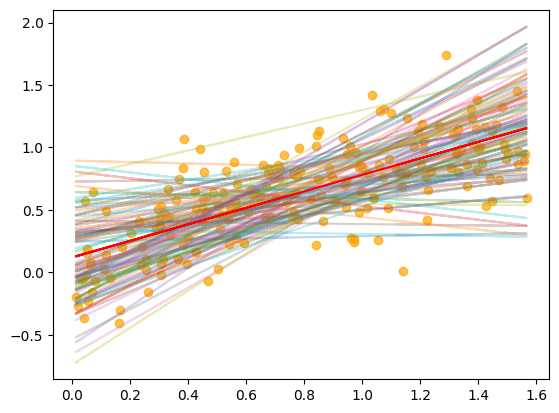

In [42]:
def new_y_prediction(x, y, new_data:NDArray, noise:int, A_inv:NDArray):
    X = np.hstack((np.ones((x.shape[0], 1)), x)).T
    new_data = np.hstack((np.ones((new_data.shape[0], 1)), new_data)).T
    y_pred = (1/noise**2) * new_data.T @ A_inv @ X @ y
    y_pred_std = new_data.T @ A_inv @ new_data
    return y_pred, y_pred_std

y_pred, y_pred_std = new_y_prediction(x_train ,y_train, x_test, NOISE, A_inv)
plt.scatter(x_test, y_test, label='Test Data (Noisy)', color='orange', alpha=0.7, )
plt.plot(x_test, y_pred, 'r', zorder=11)

y_samples = np.random.multivariate_normal(y_pred, y_pred_std, 100)
for y in y_samples:
    plt.plot(x_test, y, alpha=.3)

plt.show()